# Exercise 8

The goal of this exercise is to help you get familiarize with some of the classification methods available in Python. You will also learn how to perform cross-validation to select the right hyperparameter to avoid model overfitting.

**1.** In this exercise, you will apply a variety of classification methods to predict the forest cover type of various regions in Japan using remote sensing satellite data. The original data was obtained from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Forest+type+mapping). First, you need to download the dataset from the following link (https://archive.ics.uci.edu/ml/machine-learning-databases/00333/). Unzip the ForestTypes.zip file to obtain the training and testing datasets.

**2.** Load the training and testing datasets into separate pandas dataframes object named train and test, respectively. Count the number of rows in the training and test sets and display the first 5 data points in the training set.

**Solution:**

In [1]:
import pandas as pd

train = pd.read_csv('training.csv')
print('Number of rows in training set =', len(train.index))
test = pd.read_csv('testing.csv')
print('Number of rows in testing set =', len(test.index))
train.head()

Number of rows in training set = 198
Number of rows in testing set = 325


,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


**3.** Compute the probability distribution for each class in the training and test sets. Note that there are 4 classes of forest types in the dataset: 's' ('Sugi' forest), 'h' ('Hinoki' forest), 'd' ('Mixed deciduous' forest), and 'o' ('Other' or non-forest land). 

In [2]:
print('Class distribution for training data:') 
print(train['class'].value_counts()/train['class'].count())

print('\nClass distribution for test data:') 
print(test['class'].value_counts()/test['class'].count())

Class distribution for training data:
s     0.297980
d     0.272727
h     0.242424
o     0.186869
Name: class, dtype: float64

Class distribution for test data:
s     0.418462
d     0.323077
o     0.141538
h     0.116923
Name: class, dtype: float64


**4.** Extract the class (target) attribute Y and predictor attributes X from the training and test dataframes. Denote the extracted attributes as X_train, X_test, Y_train, and Y_test, respectively.

**Solution:**

In [3]:
from sklearn.model_selection import train_test_split

Y_train = train['class'].to_numpy()
Y_test = test['class'].to_numpy()
X_train = train.drop('class',1).to_numpy()
X_test = test.drop('class',1).to_numpy()

**5.** Train a decision tree classifier using the default hyperparameter setting provided by sklearn. Apply the decision tree to the test data ad compute the test accuracy.

In [4]:
from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(max_depth = None)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

print('Test accuracy =', accuracy_score(Y_test, Y_pred))

Test accuracy = 0.76


**6.** One of the important hyperparameters for building decision trees is max_depth. This hyperparameter determines the maximum depth of the tree you can construct. This is an important hyperparameter because it affects model overfitting and generalization performance of the resulting model. Its default value is max_depth = None, which means the tree can be constructed as deep as possible until the training error is minimized. The test accuracy for such a model is given by your answer in part 5.

In this step, you will vary the max_depth hyperparameter values from 1 to 10. Apply 10-fold cross validation on X_train and Y_train to select the hyperparameters (make sure you perform cross-validation on the training set only). For each hyperparameter, calculate the corresponding validation set accuracy, which is automatically returned by the cross_val_score function (see lecture 13). Take their average values to be the validation set accuracy for the given hyperparameter. Next, train a decision tree classifier on the entire training data (for each hyperparameter). Apply the classifier to the test data and calculate the test accuracy. To ensure repeatability, set the random_state parameter for DecisionTreeClassifier to be 1. 

Draw a plot of the test set accuracy and validation set accuracy against the maximum depth hyperparameter. Show the hyperparameter that gives the highest validation set accuracy. Show also the test accuracy associated with the chosen best hyperparameter. 

**Solution:**

Best hyperparameter: maxdepth = 2
Test Accuracy = 0.8


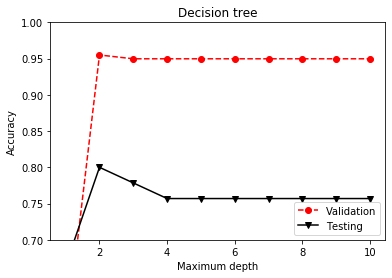

In [5]:
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline


maxdepths = [1,2,3,4,5,6,7,8,9,10]
validationAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

numFolds = 10
index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth, random_state=1)
    scores = cross_val_score(clf, X_train, Y_train, cv=numFolds)
    validationAcc[index] = np.mean(scores)
    
    clf = clf.fit(X_train, Y_train)
    Y_predTest = clf.predict(X_test)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1

plt.plot(maxdepths, validationAcc, 'ro--', maxdepths, testAcc, 'kv-')
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy')
plt.title('Decision tree')
plt.legend(['Validation','Testing'])
plt.ylim([0.7,1.0])

bestHyperparam = np.argmax(validationAcc)
print('Best hyperparameter: maxdepth =', maxdepths[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])

**7.** Repeat the previous question using a k-nearest neighbor classifier. Vary the number of nearest neighbors (k) as follows: [1, 3, 5, 7, 10, 15, 20, 25, 30]. Use 10-fold cross validation for hyperparameter tuning and store the validation set accuracy for each hyperparameter by averaging the accuracy over all 10 folds. Report also the test accuracy for each hyperparameter and draw a plot of test set accuracy and validation set accuracy against the number of nearest neighbors. Display the hyperparameter that gives the highest validation accuracy. Display the test accuracy associated with the chosen best hyperparameter.

**Solution:**

Best hyperparameter: k = 1
Test Accuracy = 0.8646153846153846


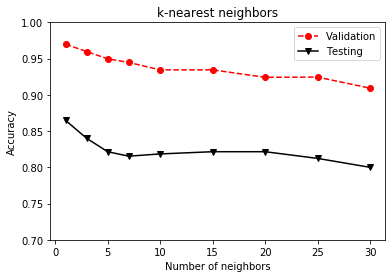

In [6]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1, 3, 5, 7, 10, 15, 20, 25, 30]
validationAcc = np.zeros(len(numNeighbors))
testAcc = np.zeros(len(numNeighbors))
numFolds = 10
index = 0

for nn in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=nn)
    scores = cross_val_score(clf, X_train, Y_train, cv=numFolds)
    validationAcc[index] = np.mean(scores)
    
    clf = clf.fit(X_train, Y_train)
    Y_predTest = clf.predict(X_test)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1

plt.plot(numNeighbors, validationAcc, 'ro--', numNeighbors, testAcc, 'kv-')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('k-nearest neighbors')
plt.legend(['Validation','Testing'])
plt.ylim([0.7,1.0])

bestHyperparam = np.argmax(validationAcc)
print('Best hyperparameter: k =', numNeighbors[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])

**8.** Repeat previous question using logistic regression with 'l1' penalty and 'liblinear' as its solver. Set the regularization parameter C to a value chosen from [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]. Use 10-fold cross validation for hyperparameter tuning and store the validation set accuracy for each hyperparameter by averaging the accuracy over all 10 folds. Report also the test accuracy for each hyperparameter and draw a plot of test set accuracy and validation set accuracy against the regularization parameter C. Display the hyperparameter that gives the highest validation accuracy. Display the test accuracy associated with the chosen best hyperparameter.

**Solution:**

Best hyperparameter, C = 0.05
Test Accuracy = 0.84


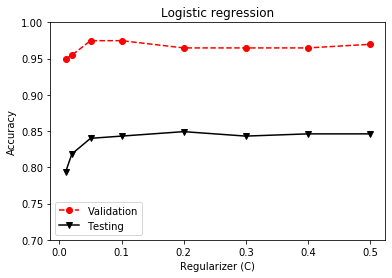

In [7]:
from sklearn import linear_model

regularizers = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
validationAcc = np.zeros(len(regularizers))
testAcc = np.zeros(len(regularizers))
numFolds = 10
index = 0

for C in regularizers:
    clf = linear_model.LogisticRegression(C=C,solver='liblinear',penalty='l1')
    scores = cross_val_score(clf, X_train, Y_train, cv=numFolds)
    validationAcc[index] = np.mean(scores)
    
    clf = clf.fit(X_train, Y_train)
    Y_predTest = clf.predict(X_test)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
plt.plot(regularizers, validationAcc, 'ro--', regularizers, testAcc, 'kv-')
plt.xlabel('Regularizer (C)')
plt.ylabel('Accuracy')
plt.title('Logistic regression')
plt.legend(['Validation','Testing'])
plt.ylim([0.7,1.0])

bestHyperparam = np.argmax(validationAcc)
print('Best hyperparameter, C =', regularizers[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])